## Data Preparation

### Modules

In [1]:
# import modules
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

### Dataset overview

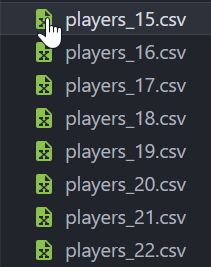

Our datasets consist of 8 separate dataset, from 15 edition to 22 edition, with 110 columns, so we need to simplify and drops some columns.

### Function for loading, cleaning datasets

In [2]:
def wrangle(filepath):
    """This function is used to wrangle data from a csv file based on the specified filepath"""
    # Read csv file
    df = pd.read_csv(filepath)
    
    # Subset the data to only columns that needed
    df = df.iloc[:, :78]
    
    # Create a new column named 'game_edition' to differentiate between each file when we merge them
    df['game_edition'] = df['player_url'].str.split('/', expand=True)[6].str.slice(stop=2)
    
    # Remove unwanted columns
    df.drop(['player_url', 'club_team_id', 'club_loaned_from', 'nation_team_id', 'real_face'], axis=1, inplace=True)
    
    # Change data types of 'dob' and 'club_joined' from object to datetime
    df['dob'] = pd.to_datetime(df['dob'])
    df['club_joined'] = pd.to_datetime(df['club_joined'])
    
    return df

Using list comprehension to create a list of filepath based on 'pattern'

In [3]:
files = [f"fifa_player/players_{year}.csv" for year in range(15,23)]

Using `wrangle` function in list comprehension to create a list of dataframe

In [4]:
frames = [wrangle(file) for file in files]

Using `concat` to merge all list items into one dataframe

In [5]:
df = pd.concat(frames)

## Data Understanding

In [48]:
# show top five rows
df.head()

,sofifa_id,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,...,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,game_edition,player_first_positions,position,top_league
0,158023,L. Messi,Lionel Andrés Messi Cuccittini,CF,93,95,100500000.0,550000.0,27,1987-06-24,...,6,11,15,14,8,NaN,15,CF,Attacker,Yes
1,20801,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"LW, LM",92,92,79000000.0,375000.0,29,1985-02-05,...,7,11,15,14,11,NaN,15,LW,Attacker,Yes
2,9014,A. Robben,Arjen Robben,"RM, LM, RW",90,90,54500000.0,275000.0,30,1984-01-23,...,10,8,11,5,15,NaN,15,RM,Midfielder,Yes
3,41236,Z. Ibrahimović,Zlatan Ibrahimović,ST,90,90,52500000.0,275000.0,32,1981-10-03,...,13,15,10,9,12,NaN,15,ST,Attacker,Yes
4,167495,M. Neuer,Manuel Peter Neuer,GK,90,90,63500000.0,300000.0,28,1986-03-27,...,87,85,92,90,86,60.0,15,GK,Goalkeeper,Yes


In [49]:
# dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142079 entries, 0 to 19238
Data columns (total 77 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   sofifa_id                    142079 non-null  int64         
 1   short_name                   142079 non-null  object        
 2   long_name                    142079 non-null  object        
 3   player_positions             142079 non-null  object        
 4   overall                      142079 non-null  int64         
 5   potential                    142079 non-null  int64         
 6   value_eur                    140182 non-null  float64       
 7   wage_eur                     140457 non-null  float64       
 8   age                          142079 non-null  int64         
 9   dob                          142079 non-null  datetime64[ns]
 10  height_cm                    142079 non-null  int64         
 11  weight_kg                  

In [50]:
# Statistical information
df.describe()

,sofifa_id,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,league_level,club_jersey_number,...,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
count,142079.000000,142079.000000,142079.000000,1.401820e+05,140457.000000,142079.000000,142079.000000,142079.000000,140064.000000,140449.000000,...,110301.000000,142079.000000,142079.000000,142079.000000,142079.000000,142079.000000,142079.000000,142079.000000,142079.000000,15791.000000
mean,211625.235095,65.706121,70.726335,2.268820e+06,11113.728045,25.117125,181.206470,75.247911,1.378584,19.991299,...,57.787572,45.664278,47.607402,45.649913,16.542874,16.289346,16.149185,16.297947,16.654221,39.531505
std,34846.473490,7.064665,6.271695,5.779823e+06,22251.563020,4.659230,6.734544,6.997585,0.748417,16.662096,...,12.375479,20.456693,21.352377,20.963372,17.679880,16.829113,16.454171,16.991869,17.985856,10.434840
min,2.000000,40.000000,40.000000,1.000000e+03,500.000000,16.000000,154.000000,49.000000,1.000000,1.000000,...,3.000000,1.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000
25%,196142.000000,61.000000,66.000000,3.000000e+05,2000.000000,21.000000,176.000000,70.000000,1.000000,8.000000,...,50.000000,25.000000,26.000000,25.000000,8.000000,8.000000,8.000000,8.000000,8.000000,32.000000
50%,216393.000000,66.000000,70.000000,7.000000e+05,4000.000000,25.000000,181.000000,75.000000,1.000000,17.000000,...,59.000000,50.000000,54.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000,41.000000
75%,234430.000000,70.000000,75.000000,1.800000e+06,10000.000000,28.000000,186.000000,80.000000,2.000000,26.000000,...,66.000000,63.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000,47.000000
max,264640.000000,94.000000,95.000000,1.940000e+08,575000.000000,54.000000,208.000000,110.000000,5.000000,99.000000,...,96.000000,94.000000,94.000000,95.000000,91.000000,92.000000,95.000000,92.000000,94.000000,68.000000


## Data Analysis

### 1. How many players in each edition and which edition is the largest database and which edition is the smallest database?

In [57]:
# Create a new dataframe of count of each game_edition
total_players_per_ed = df.groupby('game_edition').size().to_frame(name='Total Players')
total_players_per_ed

,Total Players
game_edition,
15,16155
16,15623
17,17596
18,17954
19,18085
20,18483
21,18944
22,19239


In [61]:
# Create a figure bar chart with total_players_per_ed df using plotly.express
fig = px.bar(total_players_per_ed, 
                 x=total_players_per_ed.index,
                 y='Total Players',
                 color=total_players_per_ed.index,
                 text='Total Players')

fig.update_layout(title_text='Total Players for each FIFA Game Edition (15 - 22)',
                  xaxis_title='Game Edition',
                  yaxis_title='Total Players',
                  showlegend=False)
fig.show()

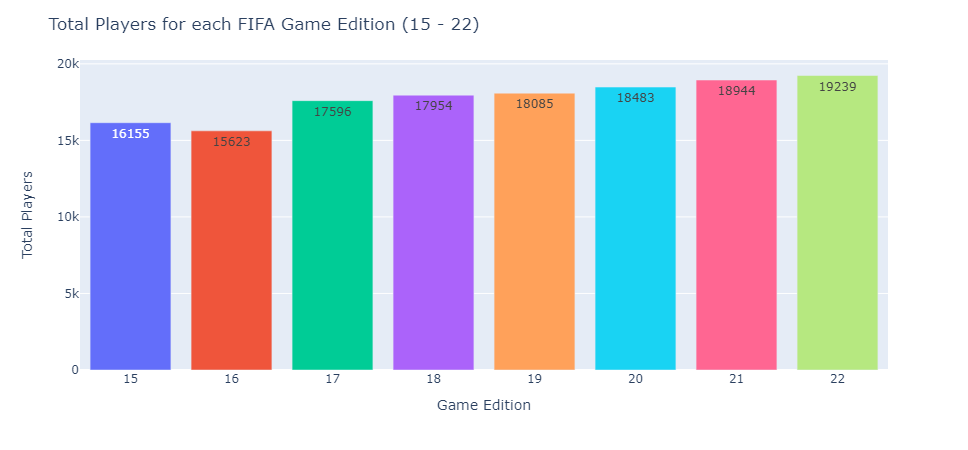

_Highlight_
* From Bar Chart above we can see that in every edition there is an increase in total players except for edition of 15 to 16.
* Edition with the most players is FIFA 22
* Edition with the least players is FIFA 16

### 2. How many players in each position for FIFA 22 edition?

In [11]:
# Because some players can play in multiple positions, we only use the first position
# split the column 'player_positions' and take the first item
df['player_first_positions'] = df['player_positions'].str.split(',', expand=True)[0]

In [12]:
# Create a function that we will apply to column 'player_first_positions'
def check_position(position):
    """This function checks if a position based on a list and return a new values"""
    if position in ['CF', 'ST', 'RW', 'LW']:
        return 'Attacker'
    elif position in ['CM', 'CDM', 'CAM', 'LM', 'RM']:
        return 'Midfielder'
    elif position in ['CB', 'RB', 'LB', 'RWB', 'LWB']:
        return 'Defender'
    else:
        return 'Goalkeeper'

In [13]:
# Apply function above to column 'player_first_positions' and create a new column
df['position'] = df['player_first_positions'].apply(check_position)

In [14]:
# Subset dataframe for game_edition FIFA 22 only
fifa_22 = df.loc[df['game_edition'] == '22']

In [63]:
# Create a histogram of distribution of FIFA 22 players position
fig = px.histogram(fifa_22,
                   x='position',
                   color='position')
fig.update_layout(title_text='Distribution of FIFA 22 Players by Position',
                  xaxis_title='Position',
                  yaxis_title='Total Players',
                  showlegend=False)
fig.show()

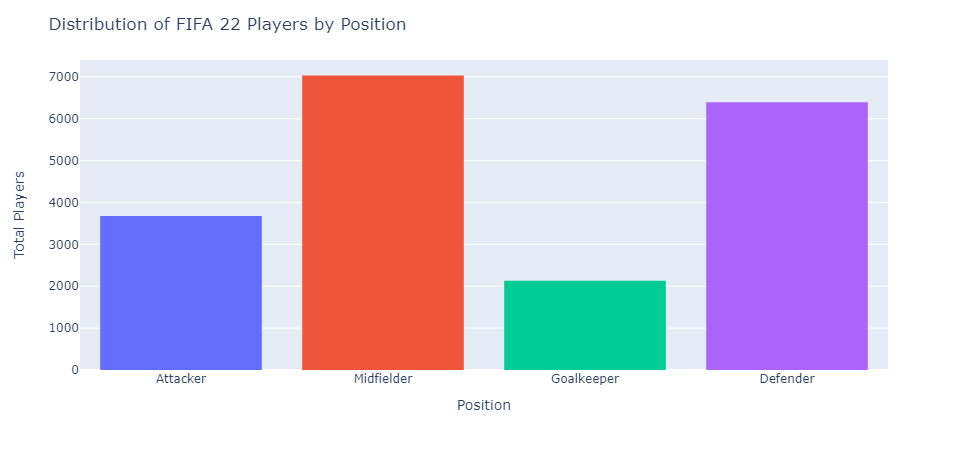

_Highlight_
* From Histogram Chart above we can see that `Midfielder` is the most total players, followed by `Defender`, `Attacker` and `Goalkeeper` is the least.

### Players Distribution in Top 6 League

In [16]:
# Create function that check if the league is top 5 for not
def is_top_league(league):
    if league in ['English Premier League',
                  'Spain Primera Division',
                  'Italian Serie A',
                  'French Ligue 1',
                  'German 1. Bundesliga',
                  'Portuguese Liga ZON SAGRES']:
        return 'Yes'
    else:
        return 'No'

In [17]:
# Apply is_top_league function to column 'league_name'and create a new column
df['top_league'] = df['league_name'].apply(is_top_league)

In [18]:
# Subset dataframe for game_edition FIFA 22 only
fifa_22 = df.loc[df['game_edition'] == '22']

# Subset dataframe for top_league only
top_league = df.loc[df['top_league'] == 'Yes']
top_league = top_league[['league_name']].value_counts().to_frame(name='Total Players').reset_index()

In [64]:
top_league

,league_name,Total Players
0,English Premier League,5190
1,Spain Primera Division,4900
2,Italian Serie A,4720
3,French Ligue 1,4699
4,German 1. Bundesliga,4335
5,Portuguese Liga ZON SAGRES,4030


In [67]:
# Create distribution of players in top_league
fig = px.bar(top_league,
             x='Total Players',
             y='league_name',
             orientation='h',
             color='league_name',
             text='Total Players')

fig.update_layout(title_text='Distribution of FIFA 22 Players League in Top 6 League',
                  xaxis_title='Total Players',
                  yaxis_title='League',
                  showlegend=False)

fig.show()

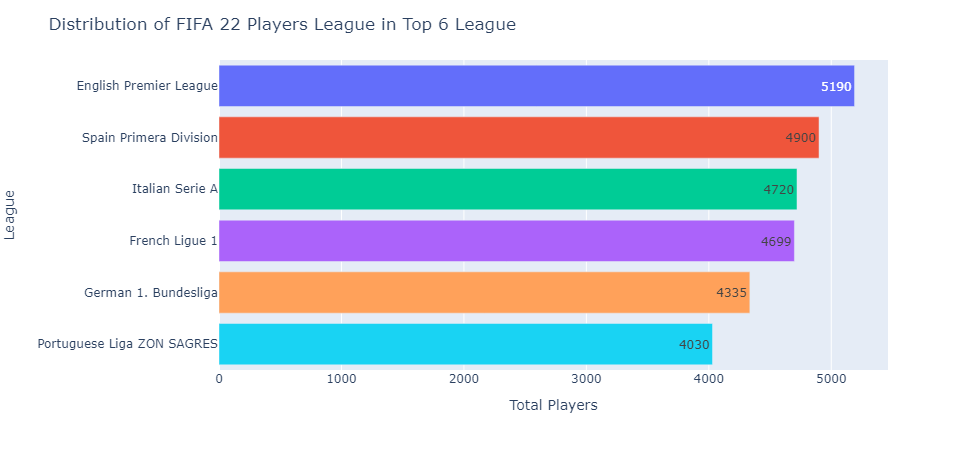

### Top Nationality

Which countries are the best when producing players with overall value >= 85?

In [68]:
# We use FIFA 22 data to subset players with overall value >= 85
top_countries = fifa_22.query('overall >= 85')
top_countries = top_countries['nationality_name'].value_counts().to_frame(name='Total Players')
top_countries

,Total Players
Spain,13
Germany,10
France,8
Brazil,8
Italy,7
England,7
Argentina,6
Netherlands,5
Portugal,5
Belgium,5


In [72]:
# Bar chart
fig = px.bar(top_countries,
             y=top_countries.index,
             x='Total Players',
             color=top_countries.index,
             orientation='h',
             text='Total Players')

fig.update_layout(title_text='Nationality of Top FIFA 22 Players',
                  xaxis_title='Total Players',
                  yaxis_title='Nationality',
                  showlegend=False,
                  height=1000)
fig.show()

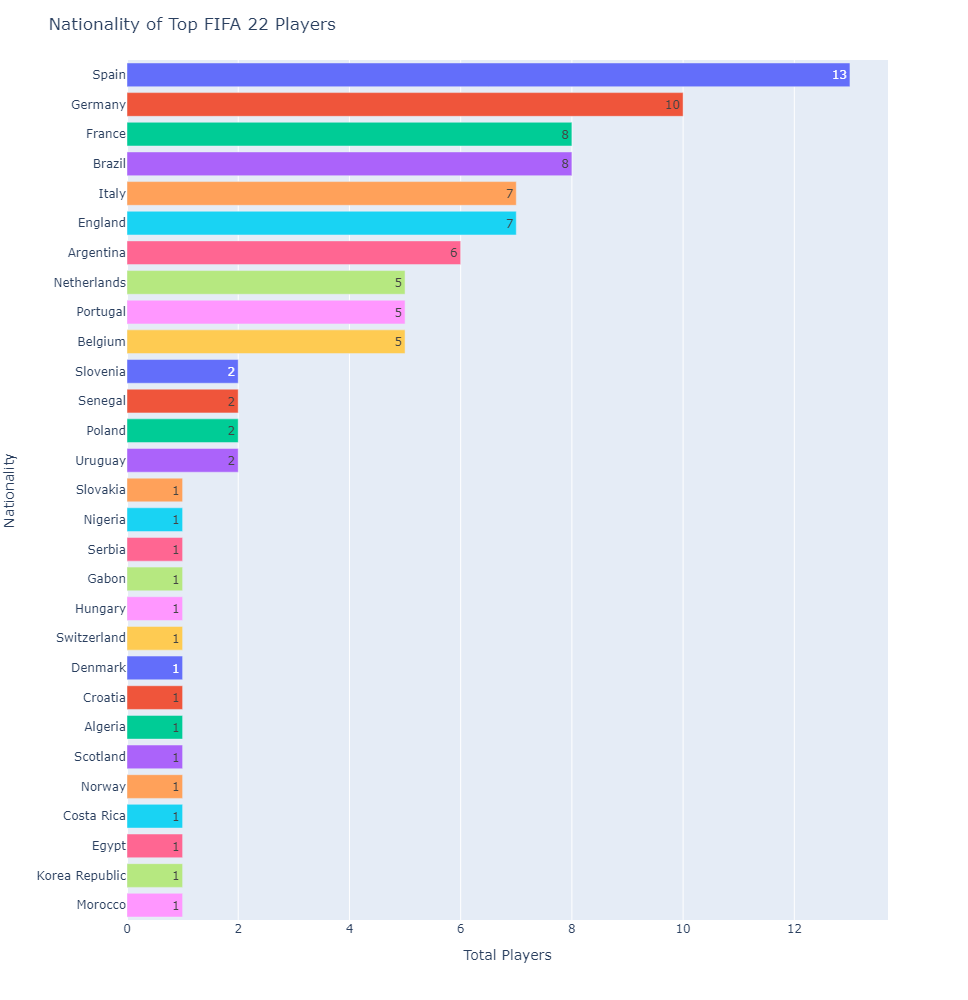

### Players preferred foot

In [73]:
# FIFA 22 Data
fig = px.histogram(fifa_22,
             x='preferred_foot',
             color='preferred_foot')

fig.update_layout(title='FIFA 22 Distribution of Preferred Foot',
                  xaxis_title='Preferred Foot',
                  yaxis_title='Total Players',
                  showlegend=False)
fig.show()

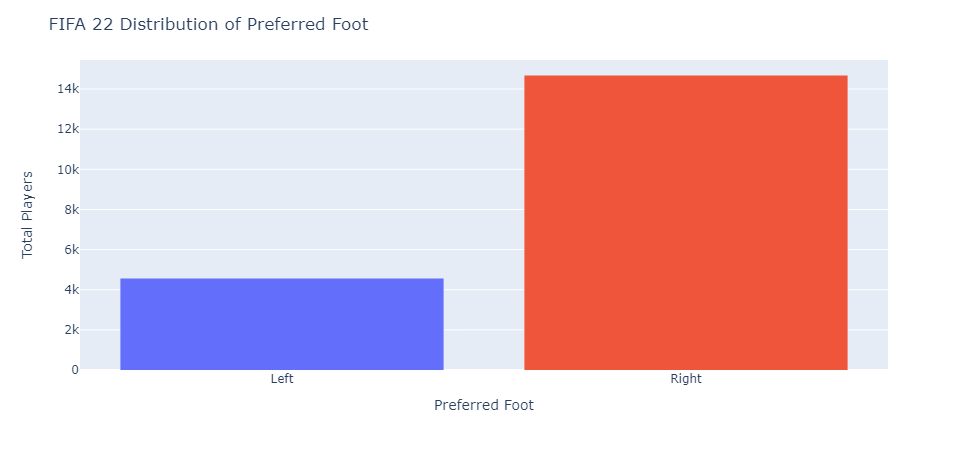

### Messi vs Ronaldo

In [23]:
messi_ronaldo = df.query('sofifa_id == 158023 or sofifa_id == 20801')

In [90]:
# Comparison of Overall value
fig = px.line(messi_ronaldo,
              x='game_edition',
              y='overall',
              color='short_name')
fig.update_layout(title_text='L. Messi vs. C. Ronaldo Overall Comparison',
                  xaxis_title='Game Edition',
                  yaxis_title='Overall Values')
fig.show()

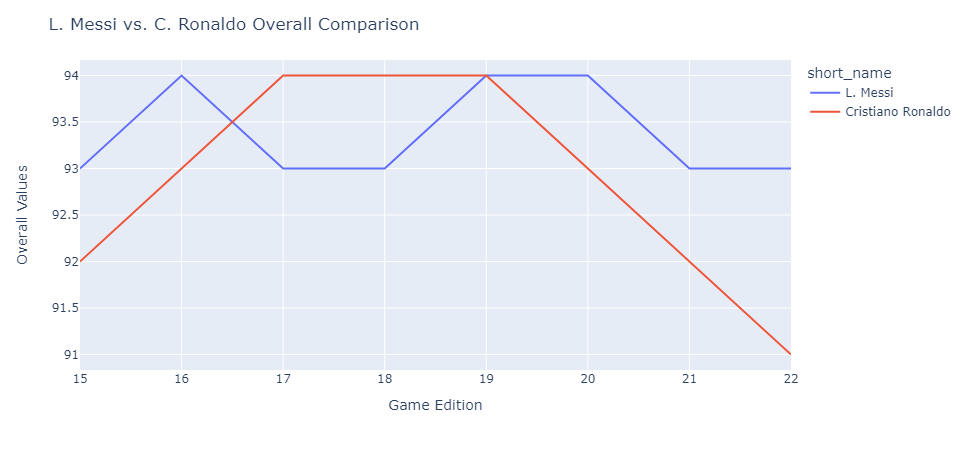

In [25]:
# Comparison of Potential Value
fig = px.line(messi_ronaldo,
              x='game_edition',
              y='potential',
              color='short_name')
fig.update_layout(title_text='L. Messi vs. C. Ronaldo Potential Comparison',
                  xaxis_title='Game Edition',
                  yaxis_title='Potential Values')
fig.show()

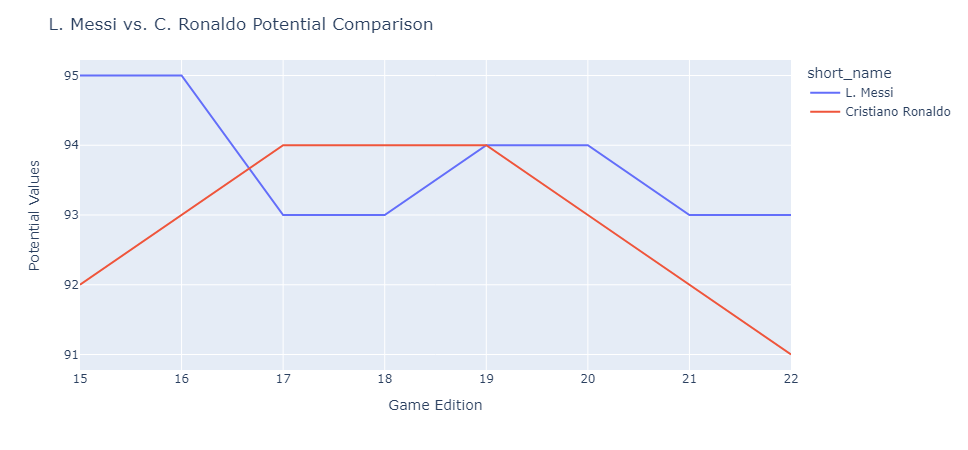

### Players Overall Value >= 85 and Age

In [80]:
top_players = fifa_22.query('overall >= 90')
top_players

,sofifa_id,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,...,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,game_edition,player_first_positions,position,top_league
0,158023,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,1987-06-24,...,6,11,15,14,8,NaN,22,RW,Attacker,Yes
1,188545,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,1988-08-21,...,15,6,12,8,10,NaN,22,ST,Attacker,Yes
2,20801,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,1985-02-05,...,7,11,15,14,11,NaN,22,ST,Attacker,Yes
3,190871,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,1992-02-05,...,9,9,15,15,11,NaN,22,LW,Attacker,Yes
4,192985,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,1991-06-28,...,15,13,5,10,13,NaN,22,CM,Midfielder,Yes
5,200389,J. Oblak,Jan Oblak,GK,91,93,112000000.0,130000.0,28,1993-01-07,...,87,92,78,90,90,50.0,22,GK,Goalkeeper,Yes
6,231747,K. Mbappé,Kylian Mbappé Lottin,"ST, LW",91,95,194000000.0,230000.0,22,1998-12-20,...,13,5,7,11,6,NaN,22,ST,Attacker,Yes
7,167495,M. Neuer,Manuel Peter Neuer,GK,90,90,13500000.0,86000.0,35,1986-03-27,...,88,88,91,89,88,56.0,22,GK,Goalkeeper,Yes
8,192448,M. ter Stegen,Marc-André ter Stegen,GK,90,92,99000000.0,250000.0,29,1992-04-30,...,88,85,88,88,90,43.0,22,GK,Goalkeeper,Yes
9,202126,H. Kane,Harry Kane,ST,90,90,129500000.0,240000.0,27,1993-07-28,...,8,10,11,14,11,NaN,22,ST,Attacker,Yes


In [86]:
fig = px.scatter(top_players,
                 x='overall',
                 y='age',
                 color='short_name',
                 text='short_name')

fig.update_layout(title='Players with Overall >=90 and their age',
                  showlegend=False)
fig.update_traces(textposition='top center')
fig.show()

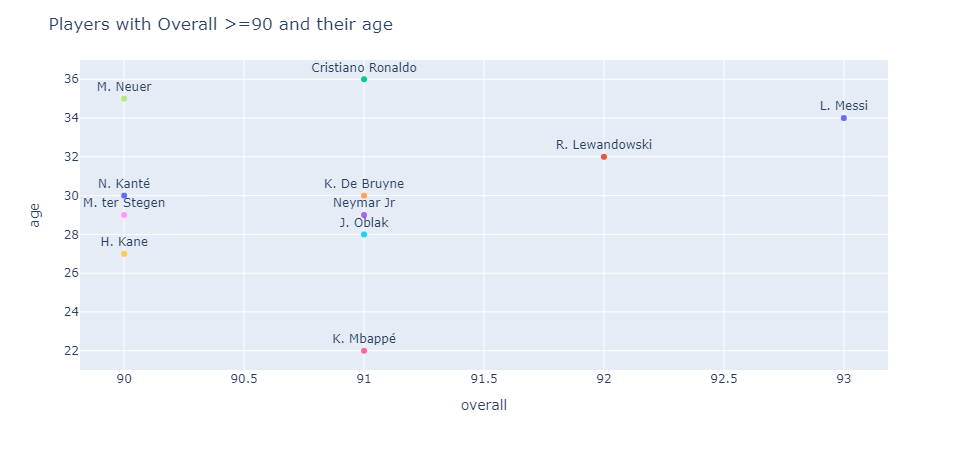

### Distribution of players age

In [87]:
fig = px.histogram(fifa_22,
             x='age')
fig.update_layout(title='Distribution of players age')
fig.show()

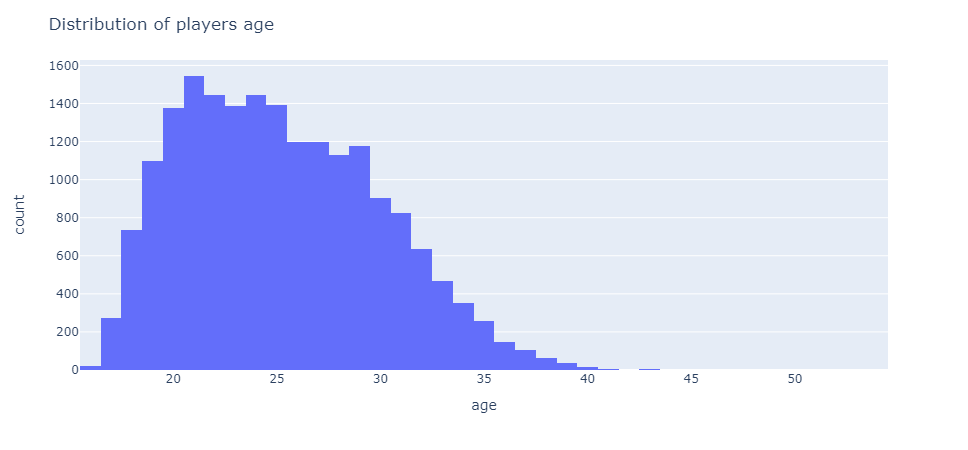